In [71]:
import drawSvg as draw
import math
from hyperbolic import util
from hyperbolic.euclid import intersection
from hyperbolic.euclid.shapes import  Arc, Line as ELine, OriginLine, Circle
from hyperbolic.poincare.shapes import *

In [73]:
def deltaLines_of_Line(Line, offset):
    hc1=Hypercycle.fromHypercycleOffset(Line,offset)
    hc2=Hypercycle.fromHypercycleOffset(Line,-offset)
    return [hc1,hc2]

In [68]:
def is_on_Linesegment(px,py, Line):
    ''' Assumes that the given point is on the line '''
    assert Line.segment
    assert isinstance(Line.projShape, ( Arc, ELine))    #check wheter Line has segment
    if isinstance(Line.projShape, ELine): 
        K1=(Line.projShape.x1-px)*(Line.projShape.x1-Line.projShape.x2)+(Line.projShape.y1-py)*(Line.projShape.y1-Line.projShape.y2)
        K2=(Line.projShape.x2-px)*(Line.projShape.x2-Line.projShape.x1)+(Line.projShape.y2-py)*(Line.projShape.y2-Line.projShape.y1)
        if K1>=0 and K2>=0:     #do we need > ?
            return True
        else:
            return False
    elif isinstance(Line.projShape,Arc):
        px = px-Line.projShape.cx
        py = py-Line.projShape.cy
        pDeg = math.degrees(math.atan2(py, px))
        if not Line.projShape.cw:
            return Line.projShape.startDeg<=pDeg and pDeg<=Line.projShape.endDeg    #do we need < ?
        else:
            return Line.projShape.startDeg>=pDeg and pDeg>=Line.projShape.endDeg    #do we need > ?

In [77]:
def ips_with_deltaneigbourhood(sideLine,deltaLines,delta):
    PL=[]
    for l in deltaLines:
        for h in deltaLines_of_Line(l,delta):
            px1,py1,px2,py2=intersection.circleCircle(h.projShape,sideLine.projShape)
            if is_on_Linesegment(px1,py1,sideLine):
                PL.append(Point.fromEuclid(px1,py1))
            elif is_on_Linesegment(px2,py1,sideLine):
                PL.append(Point.fromEuclid(px2,py2))
    return PL

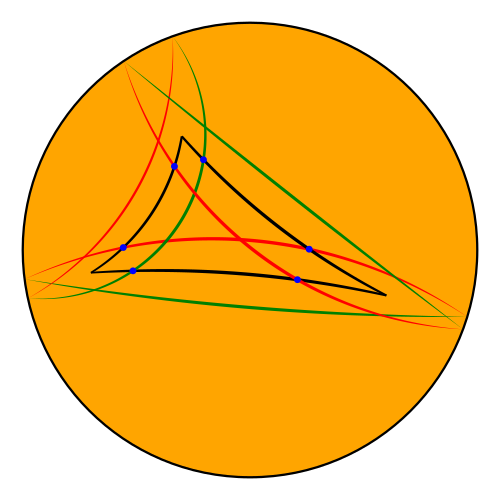

In [76]:


delta=0.3

d = draw.Drawing(2.2, 2.2, origin='center')


d.setRenderSize(500)
d.append(draw.Circle(0, 0, 1, fill='orange',stroke_width=0.01, stroke='black'))

p2=(0.6,-0.2)
p1=(-0.7,-0.1)
p3=(-0.3,0.5)
PList=[p1,p2,p3]

def triangle_sides_from_Points(Points):
    L=[]
    for i,x in enumerate(Points):
        for y in Points[i+1:]:
            L.append(Line.fromPoints(x[0],x[1],y[0],y[1],segment=True))
    return L


SList=triangle_sides_from_Points(PList)

for l in SList:
    d.draw(l, hwidth=0.03)
    hcl=deltaLines_of_Line(l,delta)
    d.draw(hcl[0],hwidth=0.03, fill='red')
    d.draw(hcl[1],hwidth=0.03, fill='green')


for i,x in enumerate(SList):
    RestList=SList[:i]+SList[i+1:]
    for y in RestList:
        for h in deltaLines_of_Line(x,delta):
            ip=intersection.circleCircle(y.projShape,h.projShape)
            if is_on_Linesegment(ip[0],ip[1],x):
                ip1=Point.fromEuclid(ip[0],ip[1])
                d.draw(ip1, radius=0.015, fill='blue')
            elif is_on_Linesegment(ip[2],ip[3],x):
                ip2=Point.fromEuclid(ip[2],ip[3])
                d.draw(ip2, radius=0.015, fill='blue')      
        #perpl1=l.makePerpendicular(ip[0],ip[1])
        #perpl2=l.makePerpendicular(ip[2],ip[3])
        #d.draw(perpl1, hwidth=0.03, fill='red')
        #d.draw(perpl2, hwidth=0.03, fill='green')

d